# Задание 09

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from itertools import combinations_with_replacement
from itertools import count
from tqdm.notebook import tqdm
%matplotlib inline
import networkx as nx

### 1. Similarity matrix  (матрица схожести) (3 балла)
* напишите функцию, вычисляющую матрицу схожести $X$ вершин простого графа, элементы матрицы:
$$
x_{ij}=\frac{J(i,j)+A_{ij}}{min(k_i,k_j)+1-A_{ij}},
$$
$J(i,j)$-число общих соседей вершин $i$ и $j$;
* Изобразите соответствующую матрицу для сети карате, используя нумерацию строк/столбцов матрицы согласно истинной структуре сообществ. 

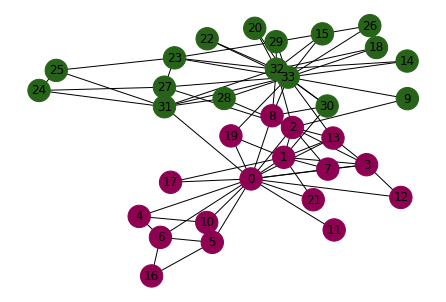

In [2]:
KC = nx.karate_club_graph()
groups = set(nx.get_node_attributes(KC,'club').values())
mapping = dict(zip(sorted(groups),count()))
nodes = KC.nodes()
colors = [mapping[KC.nodes()[n]['club']] for n in nodes]
nx.draw(KC,node_size=500,with_labels=True,node_color=colors,cmap='PiYG')

In [16]:
def simmatrix(G):
    def similarity(i, j):
        if i==j:
            return 0
        neighbors_i = set(G.neighbors(i))
        neighbors_j = set(G.neighbors(j))
        J = len(neighbors_i.intersection(neighbors_j))
        A = int(G.has_edge(i, j)) 
        x_ij = (J + A) / (min(G.degree(i), G.degree(j)) + 1 - A)
        return x_ij
    
    n = G.number_of_nodes()
    X = np.zeros((n,n))
    
    for pair in combinations_with_replacement(G.nodes(), 2):
        X[pair[0], pair[1]] = X[pair[1], pair[0]] = similarity(pair[0], pair[1])
        
    return X

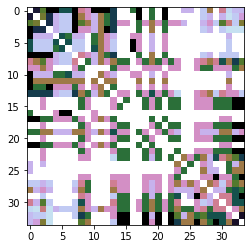

In [23]:
plt.imshow(simmatrix(KC), cmap=plt.cm.cubehelix_r)
plt.show()

In [28]:
np.unravel_index(np.argmax(simmatrix(KC)), simmatrix(KC).shape)

(0, 3)

### 2. Ravasz Algorithm (4 балла)
Реализуйте алгоритм [Ravasz](https://barabasi.com/f/108.pdf):
 1. вычислите матрицу схожести X;
 2. выберите наибольший элемент и объедините соответсвующие вершины (или сообщества) в новое сообщество;
 3. пересчитайте матрицу схожести X для нового сообщества, считая схожесть как среднее значение (см. Лекцию) 
 4. повторите шаги 2.-3. пока не получится одно сообщество. 

P/S. Можно использовать [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). 

* Примените алгоритм для сети карате. Существует ли разбиение, соответствующее истинной структуре сообществ в сети? (Разбиение на два сообщества). Если нет, то сколько вершин оказались не в своем сообществе? 

In [42]:
clust = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='precomputed')

In [45]:
clust.fit_predict(1/(simmatrix(KC)+1))

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 3.  Центральность ребер в сети (3 балла)

* Напишите функцию вычисления центральности ребра по случайному блужданию:
1. для пары вершин $(m,n)$ сгенерируйте случайное блуждание, начинающеееся  из вершины $m$ с конечной точкой траектории в вершине $n$;
2. для всех возможных пар вершин запустите случайное блуждание по несколько раз, фиксируя для каждого ребра долю траекторий,которые через него проходят.

* сравните значения центральностей по случайному блужданию и по посредничеству для сети карате. 

In [7]:
#nx.edge_betweenness_centrality(KC)